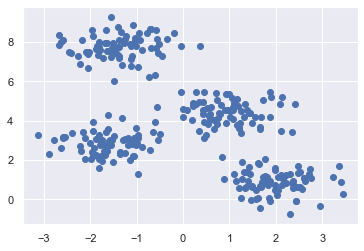

In [55]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])



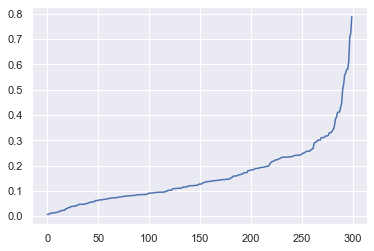

In [56]:
#расстояние от точки до ближайшего соседа - NearestNeighbors,
#точка в n_neighbors, kneighbors - возвращает два массива, 
#1 - расстояние до ближайшего n_neighborsочки, 2 - индекс для каждой из этих точек.

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

#сортируем и строим график.

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)



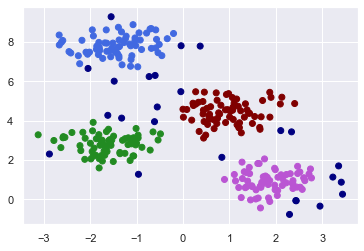

In [59]:
m = DBSCAN(eps=0.45, min_samples=5)
m.fit(X)

clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))